## BAB 1 - Mengumpulkan Data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns', None) #melihat semua kolom

In [3]:
#dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crx.data')
dataset = pd.read_csv('IOT-Temp.csv')
dataset

,id,room_id/id,day,date,temp,Strong/Weak
0,__export__.temp_log_196134_bd201015,Room Admin,Sabtu,8-12-2018,29,Weak
1,__export__.temp_log_196131_7bca51bc,Room Admin,Sabtu,8-12-2018,29,Weak
2,__export__.temp_log_196127_522915e3,Room Admin,Sabtu,8-12-2018,41,Strong
3,__export__.temp_log_196128_be0919cf,Room Admin,Sabtu,8-12-2018,41,Strong
4,__export__.temp_log_196126_d30b72fb,Room Admin,Sabtu,8-12-2018,31,Weak
...,...,...,...,...,...,...
5197,__export__.temp_log_178604_a7bc3600,Room Admin,Selasa,4-12-2018,35,Strong
5198,__export__.temp_log_178602_f93a5750,Room Admin,Selasa,4-12-2018,36,Strong
5199,__export__.temp_log_178603_7efb0bd2,Room Admin,Selasa,4-12-2018,36,Strong
5200,__export__.temp_log_178599_1177d806,Room Admin,Selasa,4-12-2018,36,Strong


## BAB 2 - Menelaah Data

### Analisis Karakteristik Data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5202 non-null   object
 1   room_id/id   5202 non-null   object
 2   day          5202 non-null   object
 3   date         5202 non-null   object
 4   temp         5202 non-null   int64 
 5   Strong/Weak  5202 non-null   object
dtypes: int64(1), object(5)
memory usage: 244.0+ KB


In [5]:
dataset.head()

,id,room_id/id,day,date,temp,Strong/Weak
0,__export__.temp_log_196134_bd201015,Room Admin,Sabtu,8-12-2018,29,Weak
1,__export__.temp_log_196131_7bca51bc,Room Admin,Sabtu,8-12-2018,29,Weak
2,__export__.temp_log_196127_522915e3,Room Admin,Sabtu,8-12-2018,41,Strong
3,__export__.temp_log_196128_be0919cf,Room Admin,Sabtu,8-12-2018,41,Strong
4,__export__.temp_log_196126_d30b72fb,Room Admin,Sabtu,8-12-2018,31,Weak


In [6]:
dataset.tail()

,id,room_id/id,day,date,temp,Strong/Weak
5197,__export__.temp_log_178604_a7bc3600,Room Admin,Selasa,4-12-2018,35,Strong
5198,__export__.temp_log_178602_f93a5750,Room Admin,Selasa,4-12-2018,36,Strong
5199,__export__.temp_log_178603_7efb0bd2,Room Admin,Selasa,4-12-2018,36,Strong
5200,__export__.temp_log_178599_1177d806,Room Admin,Selasa,4-12-2018,36,Strong
5201,__export__.temp_log_178598_5c6c8788,Room Admin,Selasa,4-12-2018,36,Strong


In [7]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


room_id/id : ['Room Admin']
day : ['Sabtu' 'Jumat' 'Kamis' 'Rabu' 'Selasa']
date : ['8-12-2018' '7-12-2018' '6-12-2018' '5-12-2018' '4-12-2018']
Strong/Weak : ['Weak' 'Strong']


### Cek Distribusi Kelas

In [8]:
dataset['Strong/Weak'].value_counts()

Strong/Weak
Strong    2962
Weak      2240
Name: count, dtype: int64

#### Temuan : Kelas hampir seimbang

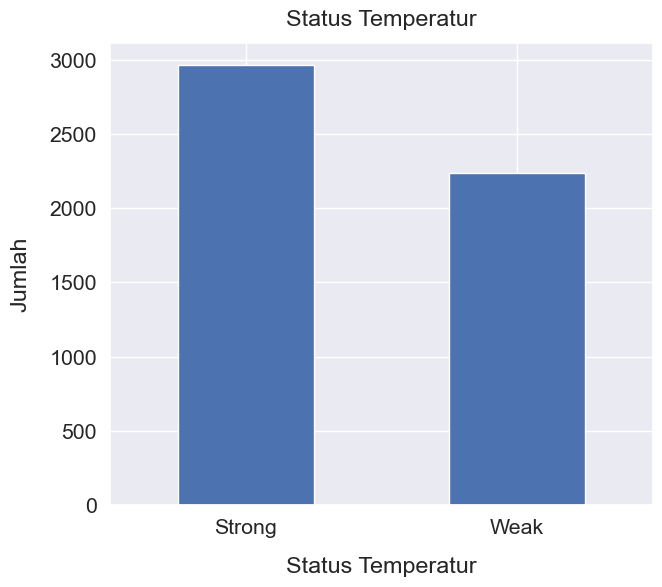

In [9]:
sns.set(font_scale=1.4)
dataset['Strong/Weak'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Temperatur", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Temperatur", y=1.02);

#### Temuan : Kelas seimbang

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['id'],order=dataset['id'].value_counts().index,hue=dataset['Strong/Weak'])
plt.show()

In [ ]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['room_id/id'],order=dataset['room_id/id'].value_counts().index,hue=dataset['Strong/Weak'])
plt.show()

#### Temuan : Strong lebih banyak di Ruang Admin

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['day'],order=dataset['day'].value_counts().index,hue=dataset['Strong/Weak'])
plt.show()

#### Temuan :
#### Jumat dan Sabtu lebih banyak yang Weak
#### Selasa, Kamis, dan Rabu lebih banyak yang Strong

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['date'],order=dataset['date'].value_counts().index,hue=dataset['Strong/Weak'])
plt.show()

#### Temuan : 
#### 7-12-2018 dan 8-12-2018 lebih banyak yang weak
#### 4-12-2018, 6-12-2018, dan 5-12-2018 lebih banyak yang strong

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['temp'],order=dataset['temp'].value_counts().index,hue=dataset['Strong/Weak'])
plt.show()

#### Temuan : temp 30 dan 31 lebih banyak yang weak

### Cek Korelasi Tahap 1

In [10]:
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

ValueError: could not convert string to float: '__export__.temp_log_196134_bd201015'

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["id"] = le.fit_transform(dataset["id"])
dataset["room_id/id"] = le.fit_transform(dataset["room_id/id"])
dataset["day"] = le.fit_transform(dataset["day"])
dataset["date"] = le.fit_transform(dataset["date"])
dataset["Strong/Weak"] = le.fit_transform(dataset["Strong/Weak"])

In [11]:
dataset

,id,room_id/id,day,date,temp,Strong/Weak
0,5200,0,3,4,29,1
1,5199,0,3,4,29,1
2,5197,0,3,4,41,0
3,5198,0,3,4,41,0
4,5196,0,3,4,31,1
...,...,...,...,...,...,...
5197,4,0,4,0,35,0
5198,2,0,4,0,36,0
5199,3,0,4,0,36,0
5200,1,0,4,0,36,0


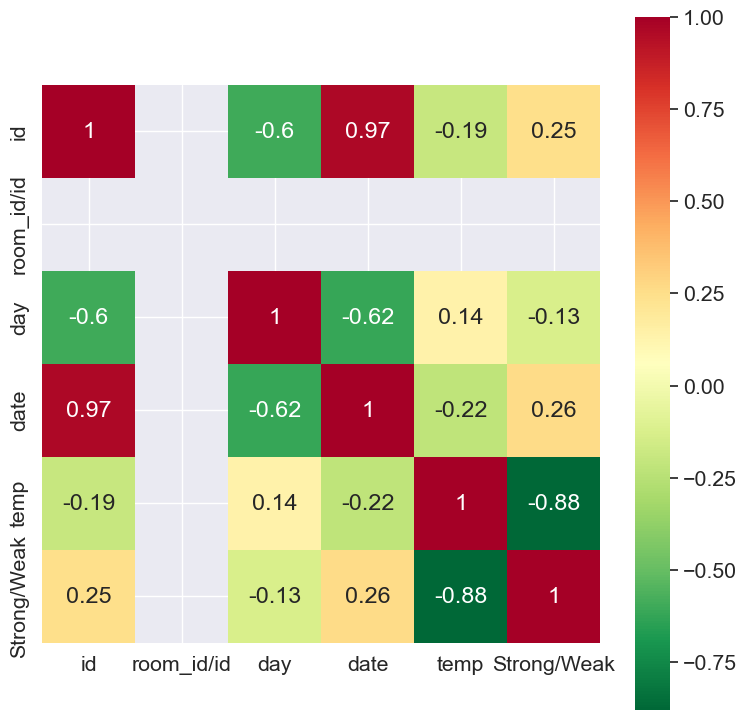

In [12]:
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## Bab 4 - Menentukan Objek Data

| Name        | Distribusi |
|-------------|------------|
| day         | Atribute   |
| date        | Atribute   |
| temp        | Atribute   |
| Strong/Weak | Class      |

### Temuan : atribute yang digunakan hanya 4 dari 6 atribute yang ada dikarenakan pada room_id datanya sama dan pada id dan date terdapat kesamaan nilai korelasi sehingga yang dipilih hanya salah satu

## Bab 5 - Membersihkan Data

In [13]:
dataset.replace("?", np.nan, inplace= True) #membersihkan data yang masih ada tanda tanya

In [14]:
dataset.head()

,id,room_id/id,day,date,temp,Strong/Weak
0,5200,0,3,4,29,1
1,5199,0,3,4,29,1
2,5197,0,3,4,41,0
3,5198,0,3,4,41,0
4,5196,0,3,4,31,1


In [15]:
dataset.tail()

,id,room_id/id,day,date,temp,Strong/Weak
5197,4,0,4,0,35,0
5198,2,0,4,0,36,0
5199,3,0,4,0,36,0
5200,1,0,4,0,36,0
5201,0,0,4,0,36,0


In [16]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")
    else :
        print(f"{column} : Tidak ada data kategorikal")

id : Tidak ada data kategorikal
room_id/id : Tidak ada data kategorikal
day : Tidak ada data kategorikal
date : Tidak ada data kategorikal
temp : Tidak ada data kategorikal
Strong/Weak : Tidak ada data kategorikal


In [17]:
dataset.isnull().values.any() #Jika True artinya ada data yg hilang

False

In [18]:
dataset.loc[:, dataset.isnull().any()].columns #Feature yg terdiri data hilang

Index([], dtype='object')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           5202 non-null   int32
 1   room_id/id   5202 non-null   int32
 2   day          5202 non-null   int32
 3   date         5202 non-null   int32
 4   temp         5202 non-null   int64
 5   Strong/Weak  5202 non-null   int32
dtypes: int32(5), int64(1)
memory usage: 142.4 KB


In [20]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
if missingdata_df:
    msno.matrix(dataset[missingdata_df])
else:
    print("Tidak ada kolom dengan data yang hilang dalam DataFrame.")

Tidak ada kolom dengan data yang hilang dalam DataFrame.


## BAB 6 - Mengkontruksi Data

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           5202 non-null   int32
 1   room_id/id   5202 non-null   int32
 2   day          5202 non-null   int32
 3   date         5202 non-null   int32
 4   temp         5202 non-null   int64
 5   Strong/Weak  5202 non-null   int32
dtypes: int32(5), int64(1)
memory usage: 142.4 KB


#### Temuan : sudah tidak ada tipe data kategorikal/ object

### Menghapus Nilai Konstan

In [22]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           5202 non-null   int32
 1   day          5202 non-null   int32
 2   date         5202 non-null   int32
 3   temp         5202 non-null   int64
 4   Strong/Weak  5202 non-null   int32
dtypes: int32(4), int64(1)
memory usage: 122.0 KB


#### Temuan : terdapat data yang konstan ya itu pada kolom Room_id/id

### Cek Korelasi Tahap 2

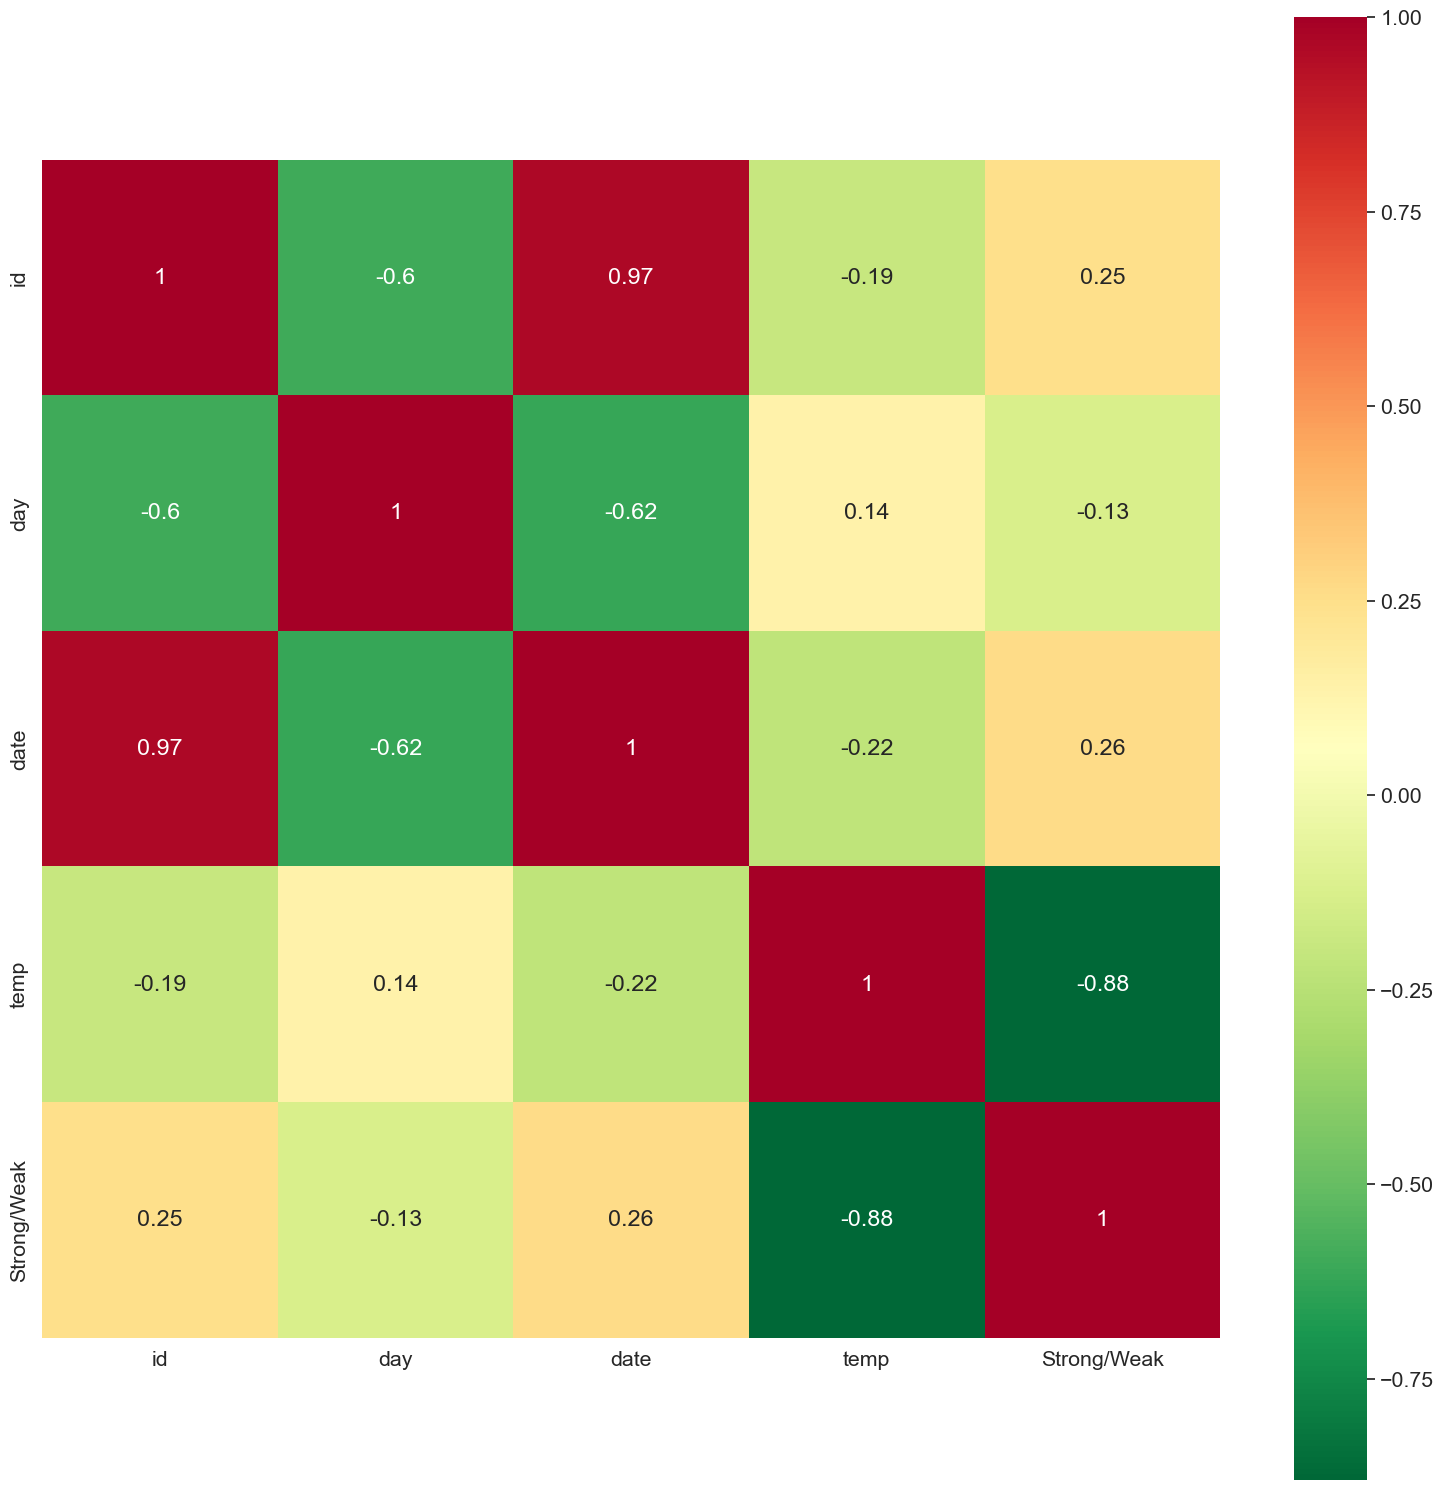

In [24]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

#### temuan : kolom id dan date harus dipilih salah satu 

In [25]:
dataset.drop(['id'], axis="columns", inplace=True) #menghapus atribut id

C:\Users\NIAR\AppData\Local\Temp\ipykernel_4604\24133069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['id'], axis="columns", inplace=True) #menghapus atribut id


In [26]:
dataset.info() #cek kembali dataset feature yg sudah di pilih

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          5202 non-null   int32
 1   date         5202 non-null   int32
 2   temp         5202 non-null   int64
 3   Strong/Weak  5202 non-null   int32
dtypes: int32(3), int64(1)
memory usage: 101.7 KB


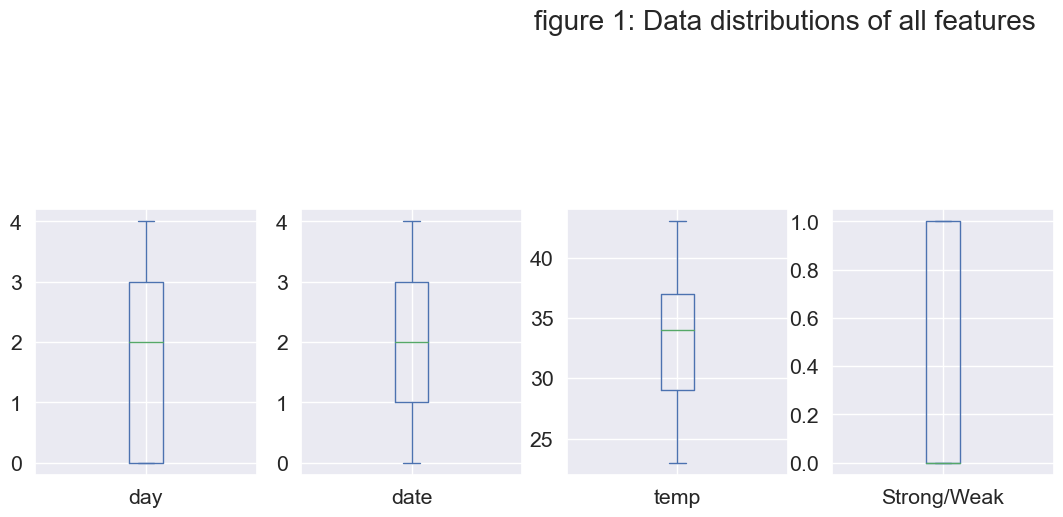

In [27]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

#### Temuan : tidak terdapat outlier pada data

## BAB 7 - Menentukan Label Data

In [28]:
y = dataset['Strong/Weak']

In [29]:
y

0       1
1       1
2       0
3       0
4       1
       ..
5197    0
5198    0
5199    0
5200    0
5201    0
Name: Strong/Weak, Length: 5202, dtype: int32

In [30]:
x=dataset.drop(['Strong/Weak'], axis=1)

In [31]:
x.shape

(5202, 3)

In [32]:
x

,day,date,temp
0,3,4,29
1,3,4,29
2,3,4,41
3,3,4,41
4,3,4,31
...,...,...,...
5197,4,0,35
5198,4,0,36
5199,4,0,36
5200,4,0,36


## BAB 8- Membangun Model

In [33]:
#Split Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [34]:
# Model Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [35]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [36]:
# Model Evaluasi
from sklearn.metrics import accuracy_score
print('Naive Bayes Accuracy: ',accuracy_score(y_test, y_pred))

Naive Bayes Accuracy:  0.9814221652786675


In [37]:
#Menginput data baru dan mengklasifikasikannya 
# Jika output = [0] maka termasuk kategori 'Tepat Waktu'
# Jika output = [1] maka termasuk kategori 'Tidak Tepat Waktu'
import numpy as np

x_new = np.array([[2,3,30.5]])

prediksi = model.predict(x_new)

print("Data ini masuk kategori : ",prediksi)

Data ini masuk kategori :  [1]


C:\a-dev\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
